In [1]:
# Importando os módulos:
import pandas as pd
import folium
from folium import plugins, Map
import matplotlib.pyplot as plt
import collections
import datetime
import numpy as np
from API_google import reverse_geocode

In [2]:
# Leitura do arquivo base
df = pd.read_csv(r"dataset_v01.csv", delimiter=";")
df = df.rename(columns={'id': 'ID_USUARIO', 'dat_nsc': 'DATA_NASCIMENTO', 'renda': 'RENDA', 'renda_SPEC': 'RENDA_FIXA', 'latitude': 'LATITUDE', 'longitude': 'LONGITUDE', 'tipo_pessoa': 'TIPO_PESSOA'})

# Criando novas colunas CIDADE, ESTADO e LOGRADOURO
df['CIDADE'] = 'NaN'
df['ESTADO'] = 'NaN'
df['LOGRADOURO'] = 'NaN'

# Formatação das coordenadas, trocado as virgulas por ponto e removendo registros sem coordenadas
df['LATITUDE'] = df['LATITUDE'].str.replace(',','.')
df['LONGITUDE'] = df['LONGITUDE'].str.replace(',','.')
#df.dropna(subset=['LATITUDE'], inplace=True)

In [3]:
# Utilização da API Google Maps para inserção dos dados regionais, "CIDADE" e "ESTADO"
for index, row in df.iterrows():
    try:
        result = reverse_geocode(row['LATITUDE'], row['LONGITUDE'])
        df.loc[index,'CIDADE'] = result[0]
        df.loc[index,'ESTADO'] = result[1]
        df.loc[index,'LOGRADOURO'] = result[2]
        df.loc[index,'TIPO_PESSOA'] = result[3]
    except:
        pass

HTTPError: HTTP Error: 400

In [ ]:
df

In [5]:
# Separando os dados por Renda
renda_1 = df.query('renda == "DE R$ 788,00 A R$ 1.140,00"')
renda_2 = df.query('renda == "DE R$ 1.900,00 A R$ 3.800,00"')
renda_3 = df.query('renda == "DE R$ 3.800,00 A R$ 7.600,00"')
renda_4 = df.query('renda == "MAIOR QUE R$ 7.600,00"')

In [30]:
mapa = folium.Map(location=[lat,lng],zoom_start=5,tiles='Stamen Toner')

In [31]:
# Exibição do mapa de calor com as coordenadas do conjunto de dados disponibilizado
mapa.add_child(plugins.HeatMap(coordenadas))

In [32]:
# Salvando arquivo html da amostragem do mapa de calor
mapa.save('mapa-consumidor.html')

In [33]:
# Números de registros por RENDA
df['renda'].value_counts()

DE R$ 1.900,00 A R$ 3.800,00    4177
DE R$ 788,00 A R$ 1.140,00      2757
DE R$ 3.800,00 A R$ 7.600,00    1737
MAIOR QUE R$ 7.600,00             72
Name: renda, dtype: int64

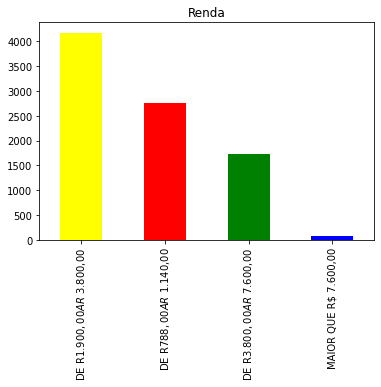

In [34]:
df['renda'].value_counts().plot(kind='bar',title='Renda', color=['yellow', 'red', 'green', 'blue']);